# http://karpov.courses

# Промежуточный проект: e-commerce

## Описание данных
### olist_customers_datase.csv - таблица с информацией о клиентах
* customer_id - идентификатор клиента в системе.
* customer_unique_id - уникальный идентификатор клиента (аналог номера паспорта).
* customer_zip_code_prefix - почтовый индекс клиента.
* customer_city - адрес доставки клиента.
* customer_state - штат доставки клиента.
* ### olist_orders_dataset.csv - таблица с информацией о заказах
* order_id - уникальный идентификатор заказа (номер чека).
* customer_id - идентификатор клиента в системе.
* order_status - статус заказа; один из _**created (создан), approved (одобрен), invoiced (выставлен счёт), processing (в процессе сборки), shipped (отправлен), delivered (доставлен), unavailable (недоступен), canceled (отменён)**_.
* order_purchase_timestamp - время создания заказа.
* order_approved_at - время подтверждения оплаты заказа.
* order_delivered_carrier_date - время передачи заказа логистической службе.
* order_delivered_customer_date - время доставки заказа.
* order_estimated_delivery_date - заявленная дата доставки.
* ### olist_order_items_dataset.csv - таблица с информацией о товарах, входящих в заказы
* order_id - уникальный идентификатор заказа (номер чека).
* order_item_id - идентификатор товара внутри одного заказа.
* product_id - идентификатор товара (аналог штрихкода).
* seller_id - идентификатор производителя товара.
* shipping_limit_date - максимальная дата поставки продавцом для передачи заказа партнеру по логистике.
* price - цена за единицу товара.
* freight_value - вес товара.

## Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import requests
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

## Чтение данных

In [2]:
api_url = r'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
customers_url = r'https://disk.yandex.ru/d/QXrVDUoQvFhIcg'
orders_url = r'https://disk.yandex.ru/d/0zWmh1bYP6REbw'
items_url = r'https://disk.yandex.ru/d/xCsQ0FiC-Ue4Lg'

### Customers

In [3]:
# Получение ссылки на скачивание
response = requests.get(api_url, params={'public_key': customers_url})
print(f'Status code: {response.status_code}')
print(f"Download link: {response.json()['href']}")

Status code: 200
Download link: https://downloader.disk.yandex.ru/disk/f804b669b9cdc5ba102c29aad6c5579559287263e190f06dd12f5d4195263113/65b14737/l9rUW5QCYE1v_Vb85lc2_FJfwWdgMJ5VjRECL1sslDo-ICZm75VRCKxmbjQzyPRm81ySmP0WwqOBn9lSniY-Lg%3D%3D?uid=0&filename=olist_customers_dataset.csv&disposition=attachment&hash=s4lUpgJ0SPJ1ON4cVah4tVvdiHo%2B%2B3rzOaw5q4yyC8iBoMstcdyRfe0vbQs5cbwxq/J6bpmRyOJonT3VoXnDag%3D%3D%3A&limit=0&content_type=text%2Fplain&owner_uid=1676086898&fsize=9033957&hid=b675f8ba78c13d600facc03ba2033f9f&media_type=spreadsheet&tknv=v2


In [4]:
# Загрузка данных напрямую в pd.DataFrame
customers_df = pd.read_csv(response.json()['href'])
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
# Есть ли пропущенные значения?
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


### Orders

In [6]:
# Получение ссылки на скачивание
response = requests.get(api_url, params={'public_key': orders_url})
print(f'Status code: {response.status_code}')
print(f"Download link: {response.json()['href']}")

Status code: 200
Download link: https://downloader.disk.yandex.ru/disk/98332f571a963dabf3cac2bb546dafe479783fabfd1adb191d60710e967feaeb/65b1474d/l9rUW5QCYE1v_Vb85lc2_FMCwvSWHpAnIgUxRQB6t1NE-kaLb2q1lfdqmkuuvbZRx6gQSQCHgBk324u3rpDj0Q%3D%3D?uid=0&filename=olist_orders_dataset.csv&disposition=attachment&hash=Oyo0QHlCDI8w3ue9MPByRJBzEgLum/ZNMmXWTNQWXG8TQs6QIMnsobdGPfplDa90q/J6bpmRyOJonT3VoXnDag%3D%3D%3A&limit=0&content_type=text%2Fplain&owner_uid=1676086898&fsize=17654914&hid=87c93f55b161ccff733960c7e368d4e8&media_type=spreadsheet&tknv=v2


In [7]:
# Загрузка данных напрямую в pd.DataFrame
orders_df = pd.read_csv(response.json()['href'])
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
# Есть ли пропущенные значения?
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [9]:
# Посчитаем их
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

### Items

In [10]:
# Получение ссылки на скачивание
response = requests.get(api_url, params={'public_key': items_url})
print(f'Status code: {response.status_code}')
print(f"Download link: {response.json()['href']}")

Status code: 200
Download link: https://downloader.disk.yandex.ru/disk/1ea57f9bea24991ad92dfb9bde6987e4f63dea3e4ce9e3f1143825eef6de37be/65b14779/l9rUW5QCYE1v_Vb85lc2_BLqOxxhJrJbn52AF-XmD50NEbdTd8gXMRrqNXCXacfnpPZo6WuHinNd24yXhjMTJQ%3D%3D?uid=0&filename=olist_order_items_dataset.csv&disposition=attachment&hash=GOrR6hhegX%2B1xKqOtZgmA%2BI90i%2BAiYjmpnekGChzcjuNJpvFd6XAN2bd9pLlim9cq/J6bpmRyOJonT3VoXnDag%3D%3D%3A&limit=0&content_type=text%2Fplain&owner_uid=1676086898&fsize=15438671&hid=86fa0ab2956a1f56a0c01e930a44f547&media_type=spreadsheet&tknv=v2


In [11]:
# Загрузка данных напрямую в pd.DataFrame
items_df = pd.read_csv(response.json()['href'])
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [12]:
# Есть ли пропущенные значения?
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [13]:
# Удаляем ненужное
del api_url, customers_url, items_url, orders_url 

## Задание 1
Сколько пользователей совершили только одну покупку?

In [14]:
# Есть customer_unique_id, которые соответствуют более чем одному customer_id.
print('\ncustomers_df:')
print(customers_df[['customer_id', 'customer_unique_id']].nunique())


customers_df:
customer_id           99441
customer_unique_id    96096
dtype: int64


Что я буду считать успешной покупкой:
* **order_status** - delivered (посылка доставлена)
* **order_approved_at** не **NaN** (есть информация об оплате заказа)
* **order_delivered_customer_date** не **NaN** (есть информация о доставке заказа)

In [15]:
filtered_orders_df = orders_df.query(
    "order_status=='delivered' & order_approved_at.notna()" 
    + "& order_delivered_customer_date.notna()"
)

Объединение **filtered_orders_df** с **customers_df** и выбор только нужных столбцов.

In [16]:
merged_df = pd.merge(
    left=filtered_orders_df, right=customers_df, how="inner", on="customer_id"
)[["customer_id", "customer_unique_id"]]
merged_df.head()

,customer_id,customer_unique_id
0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff
1,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231
2,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8
3,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977
4,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6


Ищем те идентификаторы **customer_unique_ids**, которые соответствуют ровно одному **customer_id** (то есть, учитывая приведенный выше код, людей, которые совершили ровно одну успешную покупку).

In [17]:
final_df = merged_df.groupby(by='customer_unique_id', as_index=False) \
    .agg({'customer_id':'count'}) \
    .rename(columns={'customer_id': 'N'}) \
    .query('N==1')
final_df.head()

,customer_unique_id,N
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [18]:
print('Количество клиентов, совершивших ровно одну успешную покупку, равно',
      final_df.shape[0])

Количество клиентов, совершивших ровно одну успешную покупку, равно 90537


In [19]:
# Удаляем ненужное
del filtered_orders_df, final_df, merged_df 

## Задание 2
Сколько заказов в месяц в среднем не доставляется по разным причинам? Отобразите информацию об этих причинах.

Я буду рассматривать все заказы, у которых нет статуса **"delivered"**. 
Столбец **order_purchase_timestamp** (из **orders_df**), содержащий даты создания заказов, будет использоваться в качестве основы для усреднения заказов по месяцам.

In [20]:
filtered_orders_df = orders_df.query('order_status!="delivered"')[
    ["order_id", "order_status", "order_purchase_timestamp"]
]
filtered_orders_df.info()  # no NaNs

<class 'pandas.core.frame.DataFrame'>
Index: 2963 entries, 6 to 99415
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   order_id                  2963 non-null   object
 1   order_status              2963 non-null   object
 2   order_purchase_timestamp  2963 non-null   object
dtypes: object(3)
memory usage: 92.6+ KB


Преобразуем столбец **order_purchase_timestamp** в datetime, после чего извлекаем даты в виде строк формата год/месяц.

In [21]:
filtered_orders_df["order_purchase_timestamp"] = pd.to_datetime(
    filtered_orders_df["order_purchase_timestamp"]
)
filtered_orders_df["year_month"] = filtered_orders_df[
    "order_purchase_timestamp"
].dt.strftime("%Y/%m")

Проверка результата.

In [22]:
filtered_orders_df.head()

,order_id,order_status,order_purchase_timestamp,year_month
6,136cce7faa42fdb2cefd53fdc79a6098,invoiced,2017-04-11 12:22:08,2017/04
44,ee64d42b8cf066f35eac1cf57de1aa85,shipped,2018-06-04 16:44:48,2018/06
103,0760a852e4e9d89eb77bf631eaaf1c84,invoiced,2018-08-03 17:44:42,2018/08
128,15bed8e2fec7fdbadb186b57c46c92f2,processing,2017-09-03 14:22:03,2017/09
154,6942b8da583c2f9957e990d028607019,shipped,2018-01-10 11:33:07,2018/01


In [23]:
filtered_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2963 entries, 6 to 99415
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  2963 non-null   object        
 1   order_status              2963 non-null   object        
 2   order_purchase_timestamp  2963 non-null   datetime64[ns]
 3   year_month                2963 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 115.7+ KB


Далее, подсчитываем количество заказов с разными статусами, которые были созданы в течение текущего месяца.
Для удобства и наглядности результат преобразуется с помощью функции pivot. Поскольку NaN в этой таблице эквивалентен 0, а в следующих ячейках будут рассматриваться средние значения, также применяется функция fillna.

In [24]:
date_status_n = (
    filtered_orders_df.groupby(by=["year_month", "order_status"], as_index=False)
    .agg({"order_id": "count"})
    .rename(columns={"order_id": "n"})
    .pivot(columns='order_status', index='year_month', values='n')
    .fillna(value=0,)
    .sort_index()
)
date_status_n.columns.name = 'occurrences'
date_status_n.head()

occurrences,approved,canceled,created,invoiced,processing,shipped,unavailable
year_month,,,,,,,
2016/09,0.0,2.0,0.0,0.0,0.0,1.0,0.0
2016/10,0.0,24.0,0.0,18.0,2.0,8.0,7.0
2017/01,0.0,3.0,0.0,12.0,9.0,16.0,10.0
2017/02,1.0,17.0,0.0,11.0,32.0,21.0,45.0
2017/03,0.0,33.0,0.0,3.0,23.0,45.0,32.0


In [25]:
# Общее количество заказов в месяц
date_status_n['total'] = date_status_n.sum(axis=1)
date_status_n.head()

occurrences,approved,canceled,created,invoiced,processing,shipped,unavailable,total
year_month,,,,,,,,
2016/09,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0
2016/10,0.0,24.0,0.0,18.0,2.0,8.0,7.0,59.0
2017/01,0.0,3.0,0.0,12.0,9.0,16.0,10.0,50.0
2017/02,1.0,17.0,0.0,11.0,32.0,21.0,45.0,127.0
2017/03,0.0,33.0,0.0,3.0,23.0,45.0,32.0,136.0


Визуализируем количество неудачных заказов за все месяцы наблюдений. 

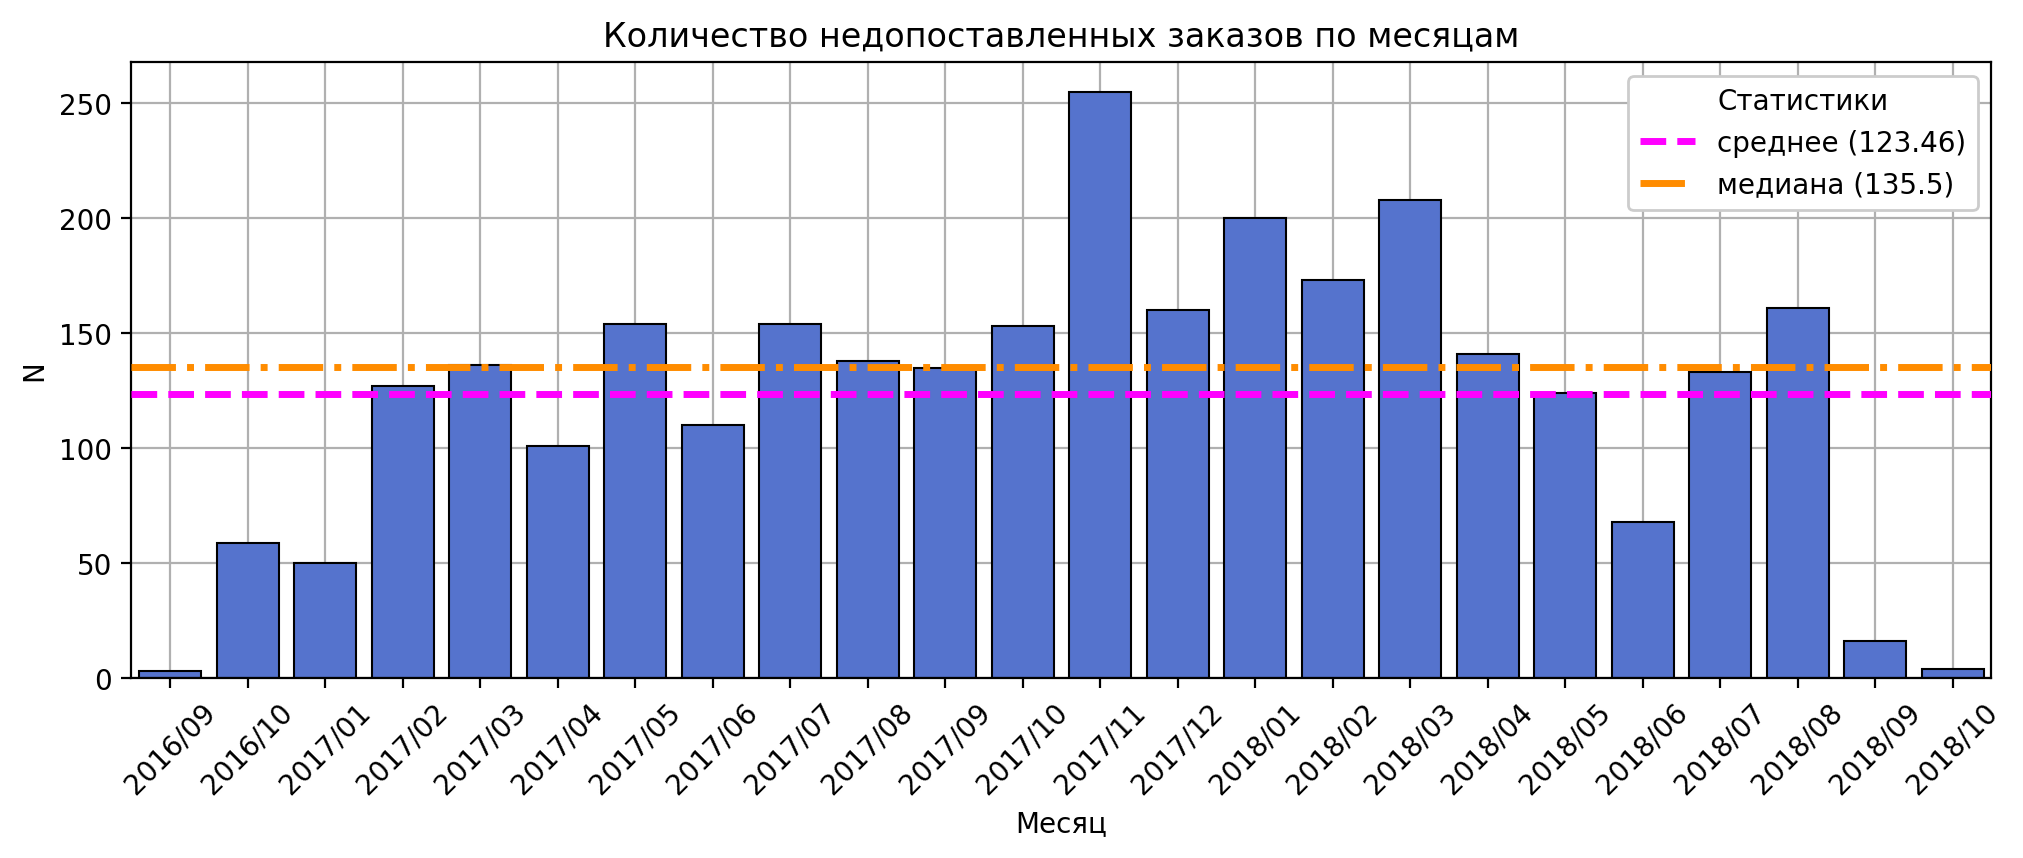

In [26]:
fig, ax = plt.subplots(dpi=200, figsize=(12, 4))
ax.axhline(date_status_n['total'].mean(), zorder=3,
           linestyle='--', linewidth=2.5, color='magenta', 
           label=f"среднее ({np.round(date_status_n['total'].mean(), 2)})")
ax.axhline(date_status_n['total'].median(), zorder=3,
           linestyle='-.', linewidth=2.5, color='darkorange',
           label=f"медиана ({np.round(date_status_n['total'].median(), 2)})")
sns.barplot(data=date_status_n, x=date_status_n.index, y='total',
            color="royalblue", edgecolor='black', linewidth=.75,
            ax=ax, zorder=2)
ax.set(xlabel='Месяц', ylabel='N', title='Количество недопоставленных заказов по месяцам')
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Статистики', framealpha=1)
ax.grid(zorder=1)
plt.show();

Теперь визуализируем среднемесячное количество недопоставленных заказов с разбивкой по статусам.

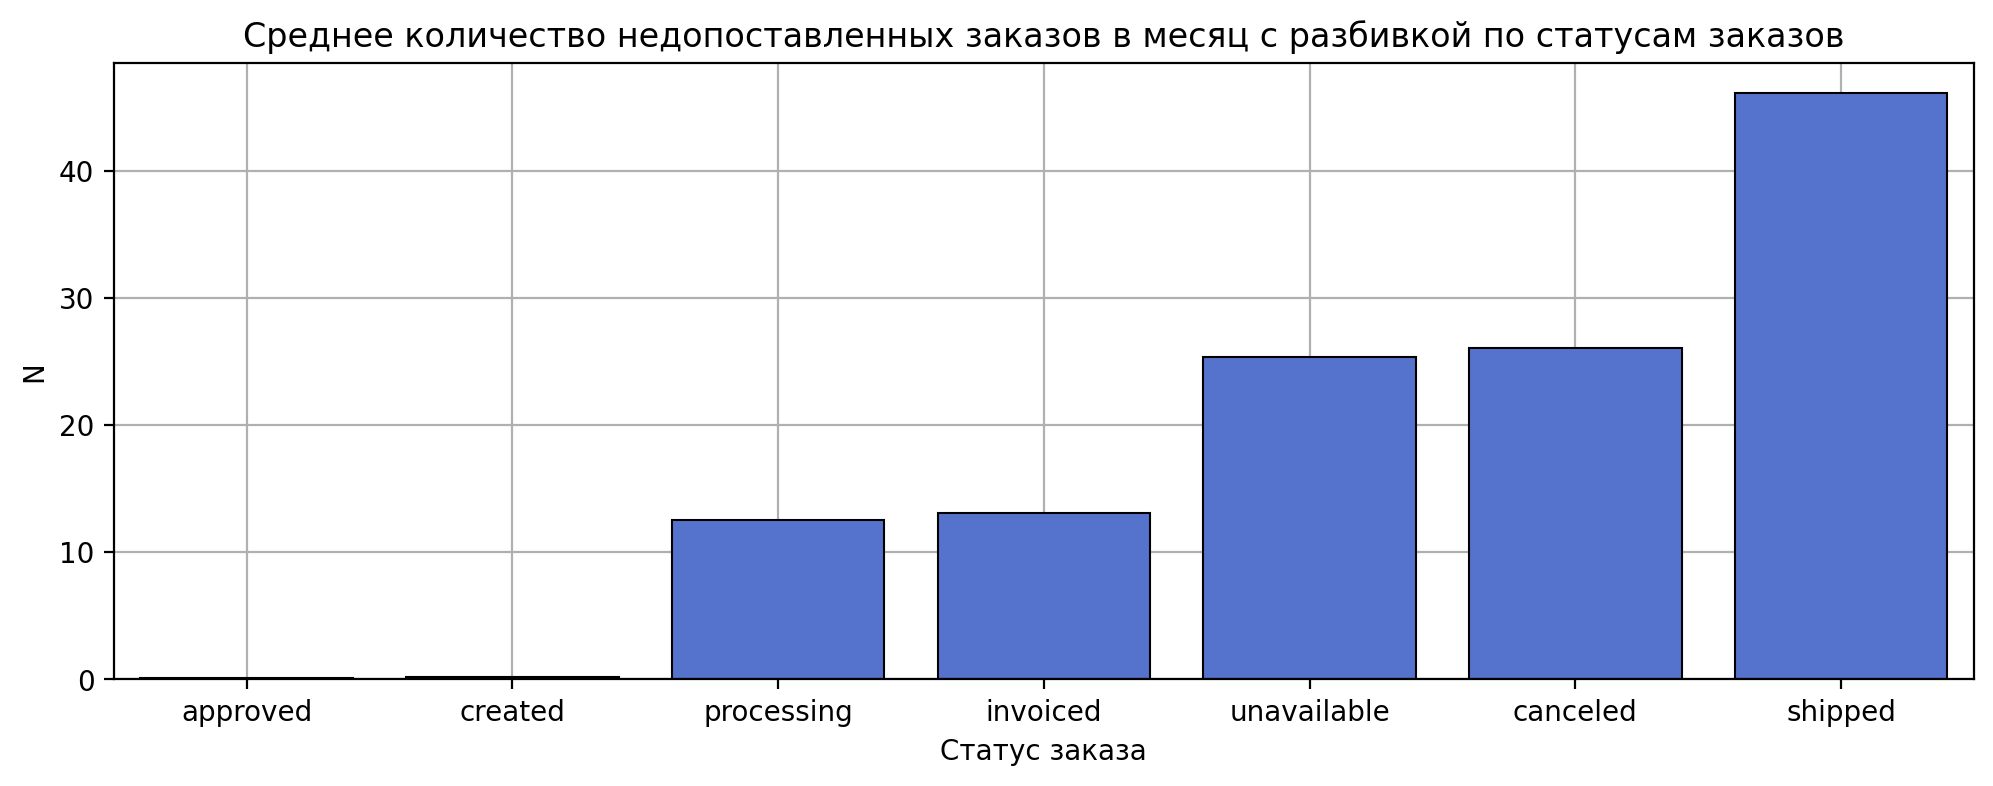

In [27]:
mean_series = date_status_n.iloc[:, :-1].mean().sort_values()

fig, ax = plt.subplots(dpi=200, figsize=(12, 4))
sns.barplot(x=mean_series.index, y=mean_series,
            color="royalblue", edgecolor='black', linewidth=.75,
            ax=ax, zorder=2)
ax.set(xlabel='Статус заказа', ylabel='N',
       title='Среднее количество недопоставленных заказов в месяц с разбивкой по статусам заказов')
ax.grid(zorder=1)
plt.show();

In [28]:
# Удаляем ненужное
del date_status_n, filtered_orders_df, mean_series

## Задание 3
По каждому товару определить, в какой день недели он покупается чаще всего.

Как и в первом задании, будем считать, что покупка успешна, если:
* **order_status** - delivered (посылка доставлена)
* **order_approved_at** не **NaN** (есть информация об оплате заказа)
* **order_delivered_customer_date** не **NaN** (есть информация о доставке заказа)

In [29]:
filtered_orders_df = orders_df.query(
    "order_status=='delivered' & order_approved_at.notna()" 
    + "& order_delivered_customer_date.notna()"
)

Объединяем таблицу с успешными заказами с таблицей, содержащей информацию о товарах в каждом заказе; выбираем только релевантные колонки.

In [30]:
merged_df=pd.merge(left=filtered_orders_df, right=items_df, how='inner',
         on='order_id')[['order_id', 'order_purchase_timestamp', 'product_id']]

Проверка результата.

In [31]:
merged_df.tail()

,order_id,order_purchase_timestamp,product_id
110169,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,f1d4ce8c6dd66c47bbaa8c6781c2a923
110170,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,b80910977a37536adeddd63663f916ad
110171,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,d1c427060a0f73f6b889a5c7c61f2ac4
110172,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,d1c427060a0f73f6b889a5c7c61f2ac4
110173,66dea50a8b16d9b4dee7af250b4be1a5,2018-03-08 20:57:30,006619bbed68b000c8ba3f8725d5409e


In [32]:
merged_df.info()  # no NaNs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110174 entries, 0 to 110173
Data columns (total 3 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   order_id                  110174 non-null  object
 1   order_purchase_timestamp  110174 non-null  object
 2   product_id                110174 non-null  object
dtypes: object(3)
memory usage: 2.5+ MB


Извлечем день недели из столбца **order_purchase_timestamp** и сохраним результат в weekday. Отбросим столбец **order_purchase_timestamp**.

In [33]:
merged_df['weekday'] = pd.to_datetime(merged_df.order_purchase_timestamp) \
    .dt.strftime('%A')
merged_df.drop(columns='order_purchase_timestamp', inplace=True)
merged_df.head()

,order_id,product_id,weekday
0,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,595fac2a385ac33a80bd5114aec74eb8,Tuesday
2,47770eb9100c2d0c44946d9cf07ec65d,aa4383b373c6aca5d8797843e5594415,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,d0b61bfb1de832b15ba9d266ca96e5b0,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,65266b2da20d04dbe00c5c2d3bb7859e,Tuesday


Подсчитаем количество покупок продуктов по дням недели и проверем полученную таблицу.

In [34]:
temp = merged_df.groupby(by=['product_id', 'weekday']).agg({'order_id':'count'}) \
    .rename(columns={'order_id':'purchases'})
temp.head(10)

purchases
product_id                       weekday             
00066f42aeeb9f3007548bb9d3f33c38 Sunday             1
00088930e925c41fd95ebfe695fd2655 Tuesday            1
0009406fd7479715e4bef61dd91f2462 Thursday           1
000b8f95fcb9e0096488278317764d19 Friday             1
                                 Wednesday          1
000d9be29b5207b54e86aa1b1ac54872 Tuesday            1
0011c512eb256aa0dbbb544d8dffcf6e Thursday           1
00126f27c813603687e6ce486d909d01 Sunday             2
001795ec6f1b187d37335e1c4704762e Monday             2
                                 Saturday           3

In [35]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 59940 entries, ('00066f42aeeb9f3007548bb9d3f33c38', 'Sunday') to ('fffe9eeff12fcbd74a2f2b007dde0c58', 'Wednesday')
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   purchases  59940 non-null  int64
dtypes: int64(1)
memory usage: 895.7+ KB


Отбираем для каждого товара день недели с максимальным количеством покупок (если товар покупался каждый день одинаковое количество раз, регистрируется первое появление).

In [36]:
final_df = temp.loc[temp.groupby(level=0)['purchases'].idxmax()] \
    .sort_values(by='purchases', ascending=False)
final_df.head(10)

,,purchases
product_id,weekday,
422879e10f46682990de24d770e7f83d,Wednesday,93
99a4788cb24856965c36a24e339b6058,Monday,91
aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
53b36df67ebb7c41585e8d54d6772e08,Tuesday,76
368c6c730842d78016ad823897a372db,Friday,67
389d119b48cf3043d311335e499d9c6b,Thursday,67
53759a2ecddad2bb87a079a1f1519f73,Wednesday,66
d1c427060a0f73f6b889a5c7c61f2ac4,Monday,62
3dd2a17168ec895c781a9191c1e95ad7,Wednesday,53


Sanity checks:
* каждому **product_id** соответствует одно значение из столбца purchases.
* таблица **final_df** меньше всех предыдущих таблиц.

In [37]:
final_df.reset_index() \
    .groupby(as_index=False, by='product_id').agg({'purchases': 'count'}) \
    .nunique()

product_id    32211
purchases         1
dtype: int64

In [38]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 32211 entries, ('422879e10f46682990de24d770e7f83d', 'Wednesday') to ('fffe9eeff12fcbd74a2f2b007dde0c58', 'Wednesday')
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   purchases  32211 non-null  int64
dtypes: int64(1)
memory usage: 597.8+ KB


In [39]:
# Удаляем ненужное
del filtered_orders_df, final_df, merged_df, temp 

## Задание 4
Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? **NOTE**: внутри месяца может быть не целое число недель. Например, в ноябре 2021 года 4,28 недели.

Как и в первом задании, будем считать, что покупка успешна, если:
* **order_status** - delivered (посылка доставлена)
* **order_approved_at** не **NaN** (есть информация об оплате заказа)
* **order_delivered_customer_date** не **NaN** (есть информация о доставке заказа)

In [40]:
filtered_orders_df = orders_df.query(
    "order_status=='delivered' & order_approved_at.notna()" 
    + "& order_delivered_customer_date.notna()"
)

Объединение **filtered_orders_df** с **customers_df** и извлечение только релевантных столбцов:

In [41]:
merged_df = pd.merge(
    left=filtered_orders_df, right=customers_df, how="inner", on="customer_id"
)[["customer_unique_id", "order_id", "order_purchase_timestamp"]]
merged_df.head()

,customer_unique_id,order_id,order_purchase_timestamp
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06
4,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39


Найдем, сколько покупок совершил каждый пользователь за тот или иной месяц.

In [42]:
# convert string to datetime
merged_df['order_purchase_timestamp'] = pd.to_datetime(
    merged_df['order_purchase_timestamp']
)
# convert datetime to "year-month" string 
merged_df['year_month'] = merged_df['order_purchase_timestamp'] \
    .dt.strftime("%Y-%m")
# group, aggregate and sort
final_df = merged_df.groupby(by=["customer_unique_id", "year_month"],
                             as_index=False) \
    .agg({"order_id": "count"}) \
    .rename(columns={"order_id":"purchases"}) \
    .sort_values(by='purchases', ascending=False)
final_df.head(10)

,customer_unique_id,year_month,purchases
7099,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01,6
23216,3e43e6105506432c953e165fb2acf44c,2018-02,4
49114,83e7958a94bd7f74a9414d8782f87628,2017-01,4
74544,c8460e4251689ba205045f3ea17884a1,2018-08,4
60358,a239b8e2fbce33780f1f1912e2ee5275,2017-02,4
14054,25a560b9a6006157838aab1bdbd68624,2017-04,4
65758,b08fab27d47a1eb6deda07bfd965ad43,2017-09,4
67347,b4e4f24de1e8725b74e4a1f4975116ed,2018-02,4
14155,25f3cf83109f636d52d288fa4e797111,2018-02,3
67855,b64ebaf3d11b7209fe566364cc359a51,2017-07,3


Определим, сколько дней и недель было в каждом релевантном месяце.

In [43]:
final_df['days_in_month'] = pd.to_datetime(final_df['year_month']).dt.daysinmonth
final_df['weeks_in_month'] = (final_df['days_in_month'] / 7).round(3)
final_df.head(10)

,customer_unique_id,year_month,purchases,days_in_month,weeks_in_month
7099,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01,6,31,4.429
23216,3e43e6105506432c953e165fb2acf44c,2018-02,4,28,4.000
49114,83e7958a94bd7f74a9414d8782f87628,2017-01,4,31,4.429
74544,c8460e4251689ba205045f3ea17884a1,2018-08,4,31,4.429
60358,a239b8e2fbce33780f1f1912e2ee5275,2017-02,4,28,4.000
14054,25a560b9a6006157838aab1bdbd68624,2017-04,4,30,4.286
65758,b08fab27d47a1eb6deda07bfd965ad43,2017-09,4,30,4.286
67347,b4e4f24de1e8725b74e4a1f4975116ed,2018-02,4,28,4.000
14155,25f3cf83109f636d52d288fa4e797111,2018-02,3,28,4.000
67855,b64ebaf3d11b7209fe566364cc359a51,2017-07,3,31,4.429


Теперь, чтобы получить среднее количество (успешных) покупок, совершенных пользователем в определенном месяце, выполним следующий код:

In [44]:
final_df["avg_weekly_purchases"] = (
    final_df["purchases"] / final_df["weeks_in_month"]
).round(3)
final_df.head(4)

,customer_unique_id,year_month,purchases,days_in_month,weeks_in_month,avg_weekly_purchases
7099,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01,6,31,4.429,1.355
23216,3e43e6105506432c953e165fb2acf44c,2018-02,4,28,4.000,1.000
49114,83e7958a94bd7f74a9414d8782f87628,2017-01,4,31,4.429,0.903
74544,c8460e4251689ba205045f3ea17884a1,2018-08,4,31,4.429,0.903


In [45]:
# Удаляем ненужное
del final_df, filtered_orders_df, merged_df

## Задание 5
Проведите когортный анализ пользователей. В период с января по декабрь определите когорту с самым высоким retention на 3-й месяц.

В этом задании все расчеты ведутся только на основе успешных покупок. Покупка считается успешной, если:
* **order_status** - delivered (посылка доставлена)
* **order_approved_at** не **NaN** (есть информация об оплате заказа)
* **order_delivered_customer_date** не **NaN** (есть информация о доставке заказа)

In [46]:
filtered_orders_df = orders_df.query(
    "order_status=='delivered' & order_approved_at.notna()" 
    + "& order_delivered_customer_date.notna()"
)

Объединим dataframe, содержащий информацию о заказе, с dataframe, содержащим информацию о клиенте, и выберем только релевантные столбцы.

In [47]:
merged_df = pd.merge(
    left=filtered_orders_df, right=customers_df, how="inner", on="customer_id"
)[["customer_unique_id", "order_purchase_timestamp"]]
merged_df.head()

,customer_unique_id,order_purchase_timestamp
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33
1,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49
3,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 21:18:39


Данные о дате (успешной) покупки хранятся в текстовом формате - преобразовываем их в datetime и сохраняем в новом столбце **purchase_timestamp**. Затем сохраняем текстовую информацию о месяце, в котором была совершена конкретная покупка, в столбце **purchase_month**.

Исходя из условий задания и имеющихся данных, выполнить когортный анализ требуется только за 2017 год. Поэтому удаляем из **merged_df** данные за другие периоды вместе с ненужным столбцом **order_purchase_timestamp** .

In [48]:
# convert string to datetime
merged_df['purchase_timestamp'] = pd.to_datetime(
    merged_df['order_purchase_timestamp']
)
# convert datetime to "year-month" string 
merged_df['purchase_month'] = merged_df['purchase_timestamp'] \
    .dt.strftime("%Y-%m")
# exclusion of unneeded data
merged_df = merged_df[merged_df["purchase_timestamp"].dt.year==2017]
merged_df.drop(columns='order_purchase_timestamp', inplace=True)
merged_df.head()

,customer_unique_id,purchase_timestamp,purchase_month
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2017-10
3,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06,2017-11
5,80bb27c7c16e8f973207a5086ab329e2,2017-07-09 21:57:05,2017-07
6,932afa1e708222e5821dac9cd5db4cae,2017-05-16 13:10:30,2017-05
7,39382392765b6dc74812866ee5ee92a7,2017-01-23 18:29:09,2017-01


Когда конкретный пользователь совершил свою первую задокументированную успешную покупку?

In [49]:
first_purchases = merged_df.groupby('customer_unique_id') \
    .agg({"purchase_timestamp": "min"}) \
    .rename(columns={"purchase_timestamp": "first_purchase_timestamp"})
first_purchases.head()

,first_purchase_timestamp
customer_unique_id,
0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42
0005e1862207bf6ccc02e4228effd9a0,2017-03-04 23:32:12
0006fdc98a402fceb4eb0ee528f6a8d4,2017-07-18 09:23:10


Добавляем в **merged_df** информацию о первых покупках в двух форматах - datetime и текстовом.

In [50]:
merged_df = pd.merge(merged_df, first_purchases, how="left",
                     left_on="customer_unique_id", right_index=True)
# convert datetime to "year-month" string 
merged_df['first_purchase_month'] = merged_df['first_purchase_timestamp'] \
    .dt.strftime("%Y-%m")
merged_df.head()

,customer_unique_id,purchase_timestamp,purchase_month,first_purchase_timestamp,first_purchase_month
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2017-10,2017-09-04 11:26:38,2017-09
3,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06,2017-11,2017-11-18 19:28:06,2017-11
5,80bb27c7c16e8f973207a5086ab329e2,2017-07-09 21:57:05,2017-07,2017-07-09 21:57:05,2017-07
6,932afa1e708222e5821dac9cd5db4cae,2017-05-16 13:10:30,2017-05,2017-05-16 13:10:30,2017-05
7,39382392765b6dc74812866ee5ee92a7,2017-01-23 18:29:09,2017-01,2017-01-23 18:29:09,2017-01


Можно видеть, что повторные покупки зачастую совершались не только в одном и том же месяце, но и с разницей в несколько минут или даже секунд.
Это одна из причин, по которой далее агрегирование выполняется функцией **nunique**.  

In [51]:
(merged_df[["customer_unique_id", "purchase_timestamp", "first_purchase_timestamp"]]) \
    [merged_df['customer_unique_id']=='12f5d6e1cbf93dafd9dcc19095df0b3d'] \
    .sort_values(by='purchase_timestamp')

,customer_unique_id,purchase_timestamp,first_purchase_timestamp
79959,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01-05 14:18:03,2017-01-05 14:18:03
4580,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01-05 14:22:02,2017-01-05 14:18:03
79036,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01-05 14:23:54,2017-01-05 14:18:03
34742,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01-05 14:50:54,2017-01-05 14:18:03
27190,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01-05 15:25:04,2017-01-05 14:18:03
909,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01-05 15:25:10,2017-01-05 14:18:03


Определение когорт пользователей и их ежемесячных вариаций.

In [52]:
temp_1 = merged_df.groupby(by=['first_purchase_month', 'purchase_month'], as_index=False) \
    .agg({"customer_unique_id": "nunique"}) \
    .rename(columns={"customer_unique_id": "unique_customers"})
temp_1.head(11)

,first_purchase_month,purchase_month,unique_customers
0,2017-01,2017-01,716
1,2017-01,2017-02,2
2,2017-01,2017-03,2
3,2017-01,2017-04,1
4,2017-01,2017-05,3
5,2017-01,2017-06,1
6,2017-01,2017-07,3
7,2017-01,2017-08,1
8,2017-01,2017-09,1
9,2017-01,2017-11,3


Определение начального размера каждой когорты.

In [53]:
temp_2 = temp_1.groupby(by=['first_purchase_month'], as_index=False) \
    .agg({"unique_customers":"max"}) \
    .rename(columns={"unique_customers": "cohort_size"})
temp_2

,first_purchase_month,cohort_size
0,2017-01,716
1,2017-02,1616
2,2017-03,2503
3,2017-04,2257
4,2017-05,3450
5,2017-06,3037
6,2017-07,3753
7,2017-08,4057
8,2017-09,4005
9,2017-10,4329


Объединение **temp_1** и **temp_2**

In [54]:
cohorts_df = pd.merge(temp_1, temp_2, how="left", on="first_purchase_month")

Зададим столбец **cohort_period** как разницу между месяцем, в котором была совершена текущая покупка, и месяцем, в котором была совершена первая документально подтвержденная покупка.

In [55]:
cohorts_df["cohort_period"] = (
    pd.to_datetime(cohorts_df["purchase_month"]).dt.month
    - pd.to_datetime(cohorts_df["first_purchase_month"]).dt.month
)

Вычислим retention как отношения количества уникальных пользователей за текущий месяц к начальному количеству уникальных пользователей в первый месяц.

In [56]:
cohorts_df['retention'] = (cohorts_df.unique_customers / cohorts_df.cohort_size)
cohorts_df.rename(columns={"first_purchase_month":"cohort"}, inplace=True)
cohorts_df.head(20)

,cohort,purchase_month,unique_customers,cohort_size,cohort_period,retention
0,2017-01,2017-01,716,716,0,1.000000
1,2017-01,2017-02,2,716,1,0.002793
2,2017-01,2017-03,2,716,2,0.002793
3,2017-01,2017-04,1,716,3,0.001397
4,2017-01,2017-05,3,716,4,0.004190
5,2017-01,2017-06,1,716,5,0.001397
6,2017-01,2017-07,3,716,6,0.004190
7,2017-01,2017-08,1,716,7,0.001397
8,2017-01,2017-09,1,716,8,0.001397
9,2017-01,2017-11,3,716,10,0.004190


Визуализируем результат.

Использование инструментов настройки стиля таблиц pandas приводит к неожиданным результатам - карта цветов ведет себя некорректно: 

In [57]:
retention_table = pd.pivot(data=cohorts_df, index='cohort', columns='cohort_period', values='retention')
ur_style = (retention_table
            .style
            .set_caption('User retention by cohort')
            .background_gradient(cmap='PuBu')
            .highlight_null('white')
            .format("{:.3%}", na_rep=""))
ur_style

cohort_period,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-01,100.000%,0.279%,0.279%,0.140%,0.419%,0.140%,0.419%,0.140%,0.140%,,0.419%,0.140%
2017-02,100.000%,0.186%,0.309%,0.124%,0.433%,0.124%,0.248%,0.186%,0.062%,0.186%,0.124%,
2017-03,100.000%,0.439%,0.360%,0.400%,0.360%,0.160%,0.160%,0.320%,0.320%,0.080%,,
2017-04,100.000%,0.620%,0.222%,0.177%,0.266%,0.266%,0.354%,0.310%,0.310%,,,
2017-05,100.000%,0.464%,0.464%,0.290%,0.290%,0.319%,0.406%,0.145%,,,,
2017-06,100.000%,0.494%,0.395%,0.428%,0.296%,0.395%,0.362%,,,,,
2017-07,100.000%,0.533%,0.346%,0.240%,0.293%,0.213%,,,,,,
2017-08,100.000%,0.690%,0.345%,0.271%,0.345%,,,,,,,
2017-09,100.000%,0.699%,0.549%,0.275%,,,,,,,,


Попробуем seaborn:

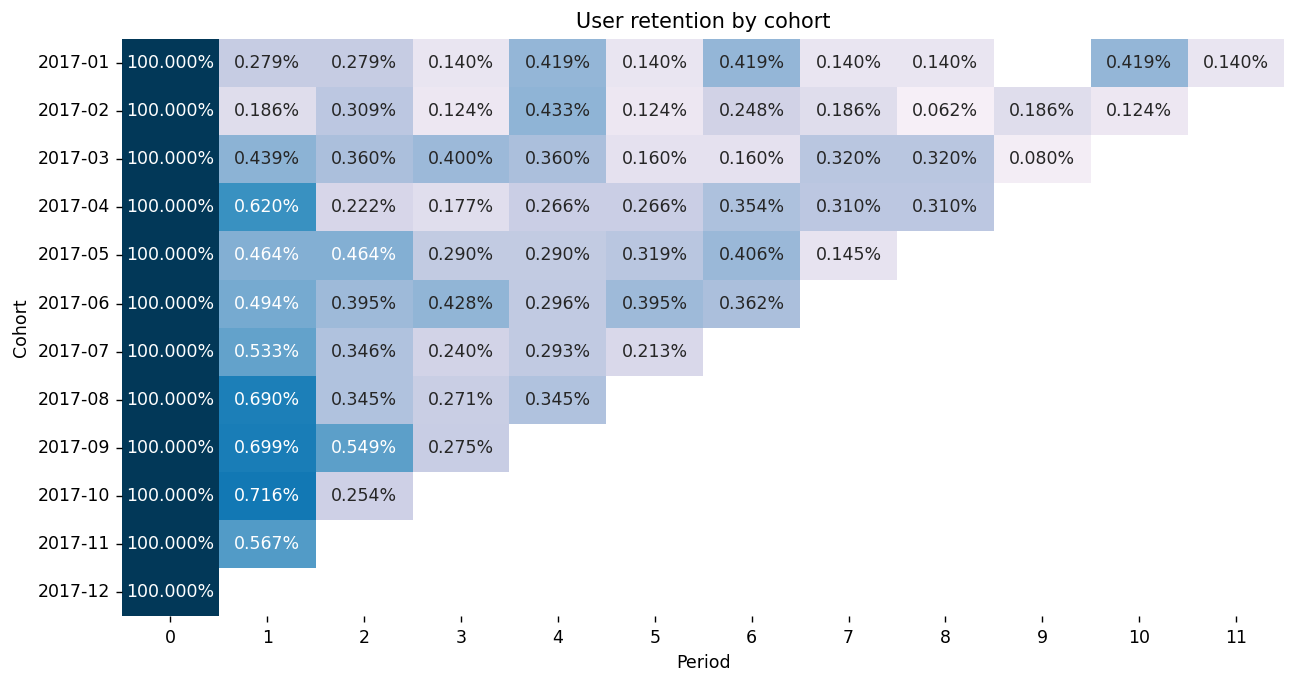

In [58]:
fig, ax = plt.subplots(dpi=125, figsize=(12, 6))
sns.heatmap(data=retention_table, annot=True, fmt='.3%',
            vmin=0.0, vmax=0.01, cmap='PuBu', cbar=False, ax=ax)
ax.set(title='User retention by cohort', xlabel='Period', ylabel='Cohort')
plt.show()

Согласному [этому](https://lab.karpov.courses/learning/297/module/2960/lesson/26389/75100/350721/),отсчет начинается с 0. Значит, требуемый третий период (месяц) будет соответствовать 4-му столбцу. 

In [59]:
print(f"Самый высокий показатель retention на третий месяц равен {np.round(100*retention_table[3].max(), 3)}%.",
      f"Он отвечает когорте {retention_table[3].idxmax()}.")

Самый высокий показатель retention на третий месяц равен 0.428%. Он отвечает когорте 2017-06.


In [60]:
# Удаляем ненужное
del (filtered_orders_df, merged_df, first_purchases, temp_1, temp_2, cohorts_df,
    retention_table)

## Задание 6
Используя python, постройте RFM-сегментацию пользователей для качественной оценки аудитории. 

Метод RFM анализирует поведение покупателей на основе трех параметров:
* R - время с момента последней покупки клиента до некоторой контрольной даты 
* F - количество покупок, совершенных клиентом за весь период мониторинга
* M - количество денег, потраченных клиентом за весь период мониторинга.

Опишите выбранные границы сегмента RFM и принципы, использованные при их выборе.

### Подготовка данных

Будем работать только с успешными покупками, которые определяются точно так же, как и в предыдущих заданиях.

In [61]:
filtered_orders_df = orders_df.query(
    "order_status=='delivered' & order_approved_at.notna()" 
    + "& order_delivered_customer_date.notna()"
)[['order_id', 'customer_id', 'order_purchase_timestamp']]  # only relevant columns
# convert string to datetime
filtered_orders_df['order_purchase_timestamp'] = pd.to_datetime(filtered_orders_df['order_purchase_timestamp']) 

Добавим колонку с уникальными идентификаторами пользователей в **filtered_orders_df** и сохраним результат в новом датафрейме **merged_df**, с которым и будем работать далее.

In [62]:
merged_df = pd.merge(
    left=filtered_orders_df, right=customers_df[["customer_id", "customer_unique_id"]],
    how="inner", on="customer_id"
)
merged_df.head()

,order_id,customer_id,order_purchase_timestamp,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6


Добавим в **merged_df** колонку со стоимостью каждого заказа **order_id**, которая получается путем агрегирования в датафрейме **items_df**.

In [63]:
merged_df = pd.merge(merged_df,
                     items_df.groupby(by='order_id', as_index=False).agg({"price":"sum"}),
                     how="inner", on="order_id")          
merged_df.head()

,order_id,customer_id,order_purchase_timestamp,customer_unique_id,price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,19.90


Чтобы рассчитать recency, нам нужно знать, сколько времени прошло с момента покупки до некоторой контрольной даты.

In [64]:
reference_date = merged_df["order_purchase_timestamp"].max() + timedelta(days=1)
merged_df["days_since_order"] = (
    reference_date - merged_df["order_purchase_timestamp"]
).dt.days

Теперь рассчитаем значения recency, frequency и monetary, сохраним результаты в новом датафрейме.

In [65]:
# calculate R, M and F
rfm_df = merged_df.groupby(by='customer_unique_id', as_index=False) \
    .agg({"days_since_order": "min", "price": ["count", "sum"]})
rfm_df.columns = pd.Index(['CustomerID','Recency', 'Frequency', 'Monetary'])
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90
2,0000f46a3911fa3c0805444483337064,537,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00


### Расчет рангов R, F, M и RFM

Чтобы разделить значения recency, frequency и monetary на диапазоны (которым будут поставлены в соответствие ранги от 1 до 4), будем использовать квартили. 

In [66]:
rfm_quartiles = rfm_df[["Recency", "Frequency",	"Monetary"]] \
    .quantile(q=[0.25, 0.50, 0.75])
rfm_quartiles

,Recency,Frequency,Monetary
0.25,114.0,1.0,47.65
0.50,219.0,1.0,89.70
0.75,346.0,1.0,154.70


Сразу же становится ясно, что квартили не являются подходящей мерой разбиения frequency на диапазоны. Почему это так?

In [67]:
rfm_df['Frequency'].value_counts()

Frequency
1     90537
2      2572
3       181
4        28
5         9
6         5
7         3
9         1
15        1
Name: count, dtype: int64

In [68]:
rfm_df['Frequency'].nunique()

9

Frequency (частота) принимает всего 9 значений, большинство из которых равно 1. Исходя из этого, я предлагаю следующее подразделение значений:
* frequency равна 1 - ранг 1
* frequency равна 2 - ранг 2
* frequency равна 3 - ранг 3
* frequency больше 3 - ранг 4

In [69]:
def f_score(x):
    '''
    Эта функция присваивает ранг от 1 до 4 некоторой частоте x,
    причем больший ранг соответствует более высокой частоте.
    '''
    if x == 1:
        return 1
    elif x == 2:
        return 2
    elif x == 3: 
        return 3
    else:
        return 4

Для присвоения рангов значениям recency и monetary на основе квартилей были написаны следующие функции:

In [70]:
def r_score(x, quartiles):
    '''
    Эта функция присваивает ранги от 1 до 4 некоторому значению recency x
    используя квартили из распределения x,
    причем больший ранг соответствует меньшему значению recency.
    '''
    if x <= quartiles['Recency'][0.25]:
        return 4
    elif x <= quartiles['Recency'][0.50]:
        return 3
    elif x <= quartiles['Recency'][0.75]:
        return 2
    else:
        return 1


def m_score(x, quartiles):
    '''
    Эта функция присваивает ранги от 1 до 4 некоторому значению monetary x
    используя квартили из распределения x,
    причем больший ранг соответствует более высокому значению monetary.
    '''
    if x <= quartiles['Monetary'][0.25]:
        return 1
    elif x <= quartiles['Monetary'][0.50]:
        return 2
    elif x <= quartiles['Monetary'][0.75]:
        return 3
    else:
        return 4


Если говорить о конкретных цифрах, то границы рангов значений recency и monetary были определены следующим образом: 

**Recency**
* значениям от 1 до 114 присвоен ранг 4
* значениям от 115 до 219 присвоен ранг 3
* значениям от 220 до 346 присвоен ранг 2
* значениям, превышающим 347, присвоен ранг 1

**Monetary**
* значениям от 0 до 47.65 (включительно) присвоен ранг 1
* значениям $\gt$47.65 и  $\le$89.70 присвоен ранг 2
* значениям $\gt$89.70 и $\le$154.70 присвоен ранг 3
* значениям, превышающим 154.70, присвоен ранг 4

Теперь рассчитаем ранги R, F, M и сохраним их в датафрейме **rfm_df**.
После чего объединим их в итоговый показатель RFM.

In [71]:
rfm_df['R'] = rfm_df['Recency'].apply(r_score, args=(rfm_quartiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(f_score)
rfm_df['M'] = rfm_df['Monetary'].apply(m_score, args=(rfm_quartiles,))
rfm_df['RFM'] = (rfm_df['R'].astype(str) + rfm_df['F'].astype(str)
                 + rfm_df['M'].astype(str)).astype(int)
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,4,1,3,413
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90,3,1,1,311
2,0000f46a3911fa3c0805444483337064,537,1,69.00,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00,2,1,4,214


In [72]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93337 entries, 0 to 93336
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  93337 non-null  object 
 1   Recency     93337 non-null  int64  
 2   Frequency   93337 non-null  int64  
 3   Monetary    93337 non-null  float64
 4   R           93337 non-null  int64  
 5   F           93337 non-null  int64  
 6   M           93337 non-null  int64  
 7   RFM         93337 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 5.7+ MB


### Выделение сегментов клиентов на основе показателей RFM

Я предлагаю разделить данные на следующие 7 сегментов:

| Сегмент | Описание |
|----------|----------|
| Чемпионы | Совершили свою последнюю покупку сравнительно недавно, покупают относительно часто и тратят больше всех |
| Лояльные клиенты | Совершили свою последнюю покупку относительно недавно, в общей сложности сделали 2-3 покупки и потратили больше денег, чем в среднем |
| Потенциальные лоялисты | Схожи с лояльными клиентами, но потратили меньше денег |
| Спящие | Совершили покупку(и) очень давно |
| Скоро уснут | Схоже с "спящими" клиентами, но их последняя покупка была совершена ближе к контрольной дате |
| Новые клиенты | Недавно совершившие свою первую покупку |
| Требуют внимания | Совершили только одну покупку, причем относительно недавно (но раньше, чем новые клиенты)|

In [73]:
segments = {
    r'[3-4]44': 'Чемпионы',
    r'[3-4][2-3][3-4]': 'Лояльные клиенты',
    r'[3-4][2-3][1-2]': 'Потенциальные лоялисты',
    r'1[1-4][1-4]': 'Спящие',
    r'2[1-4][1-4]': 'Скоро уснут',
    r'41[1-4]': 'Новые клиенты',
    r'31[1-4]': 'Требуют внимания',
}

rfm_df['Segment'] = rfm_df['RFM'].astype(str)
rfm_df['Segment'] = rfm_df['Segment'].replace(segments, regex=True)
# Проверим, все ли значения RFM были охвачены.
rfm_df['Segment'].unique()

array(['Новые клиенты', 'Требуют внимания', 'Спящие', 'Скоро уснут',
       'Потенциальные лоялисты', 'Лояльные клиенты', 'Чемпионы'],
      dtype=object)

Каковы же результаты? Как ведут себя наши клиенты?

In [74]:
rfm_df['Segment'].value_counts()

Segment
Спящие                    23297
Скоро уснут               23199
Требуют внимания          22685
Новые клиенты             22607
Лояльные клиенты           1279
Потенциальные лоялисты      233
Чемпионы                     37
Name: count, dtype: int64

Мы видим, что около половины покупателей (**Спящие** + **Скоро уснут**) совершили последнюю покупку относительно давно и, вероятно, "отсеялись".

Примерно четверть покупателей совершили свою единственную покупку в период от 115 до 219 дней до контрольной даты (**Требуют внимания**), а еще четверть - в период от 1 до 114 дней (**Новые клиенты**). Кажется логичным предложить клиентам принять участие в промо-акции, предоставить им скидку на вторую покупку и т. д. - предпринять попытку не дать им "уснуть".

Количество клиентов, совершивших более одной покупки, последняя из которых была совершена относительно недавно (**Лояльные клиенты** + **Потенциальные лоялисты** + **Чемпионы**), составляет 1,7% от общего числа клиентов.

In [75]:
# Удаляем ненужное
del (filtered_orders_df, merged_df, reference_date, rfm_df, rfm_quartiles,
     segments) 